In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SuspensionParts import Wishbone
from SuspensionParts import Upright
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

[ 1.8 -0.4  0.6]
[ 5.000000e-01 -3.061617e-17  5.000000e-01]


In [2]:
# define chassis pickup points
# origin at center of rear axle on ground
# F/R - front/rear of car
# r/l - right/left
# U/L - upper/lower
# 1/2/3 - 1=front/2=rear/3=upright of the specific wishbone

# Should make control arm and upright classes to make this easier

x1 = np.array([1,0,0])
x2 = np.array([0,0,0])
x3 = np.array([.5,-.5,0])

test_wishbone = Wishbone(x1, x2, x3)

# front right corner
# upper
FrU1 = np.array([1.9,-.4,.4])
FrU2 = np.array([1.7,-.4,.4])
FrU3 = np.array([1.8,-.6,.4])

# lower
FrL1 = np.array([1.9,-.4,.2])
FrL2 = np.array([1.7,-.4,.2])
FrL3 = np.array([1.8,-.6,.2])

FR_upper = Wishbone(FrU1, FrU2, FrU3)
FR_lower = Wishbone(FrL1, FrL2, FrL3)


# front right upright
joint_dist = .5
# define coords for ball joints and toe link so u can apply the same axis/ rotation checks to find 
# how far the upright rotated
# also define axle somehow to do same kind of math for wheel angles

In [3]:
theta = np.deg2rad(-90)
# print(theta)
print(FR_upper.rotation(theta))
print(test_wishbone.rotation(theta))

[ 1.8 -0.4  0.6]
[ 5.000000e-01 -3.061617e-17  5.000000e-01]


In [4]:
dtheta = np.deg2rad(0.5)
theta_total = 0
max_angle = np.deg2rad(90)         
steps = int(max_angle / dtheta)    

balljoint_pos = np.zeros((steps, 3))  

for i in range(steps):
    balljoint_pos[i] = test_wishbone.balljoint_pos()  
    test_wishbone.rotation(dtheta)            
    theta_total += dtheta     

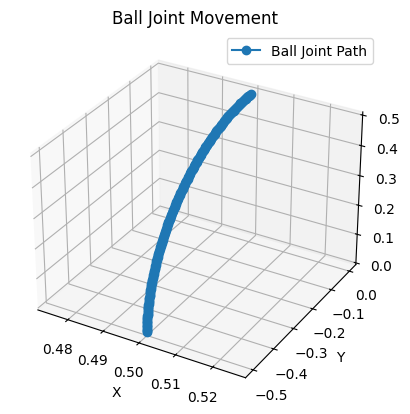

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Unpack x, y, z from balljoint_pos
x = balljoint_pos[:, 0]
y = balljoint_pos[:, 1]
z = balljoint_pos[:, 2]

# Plot the points
ax.plot3D(x, y, z, 'o-', label='Ball Joint Path')  # 'o-' for points connected with lines
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Ball Joint Movement')
ax.legend()
plt.show()
